## Convolutional Neural Networks

## Project: Write an Algorithm for a flowers Identification App 


### Why We're Here 

In this notebook, i will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, my code will accept any user-supplied image as input.and it will provide an estimate of the flower's category.

### The Road Ahead

i break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): preprocessing steps supply images to a pre-trained network in Keras
* [Step 2](#step2): Extract Bottleneck Features for Train set, valid set, Test Set.
* [Step 3](#step3): rescale the images by dividing every pixel in every image by 255.
* [Step 4](#step4): Obtain Bottleneck Features
* [Step 5](#step5): create Model Architecture
* [Step 6](#step6): Train the Model
* [Step 7](#step7): Test the Model
* [Step 8](#step8): Test the Model on Sample Images!

<a id='step0'></a>
## Step 0: Import fruits Datasets

In the code cell below, i import a dataset of flower images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `fruit_names` - list of string-valued fruit category names for translating labels


In [38]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    flower_files = np.array(data['filenames'])
    flower_targets = np_utils.to_categorical(np.array(data['target']), 5)
    return flower_files, flower_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('data/flower_images/mytrain')
valid_files, valid_targets = load_dataset('data/flower_images/myvalid')
test_files, test_targets = load_dataset('data/flower_images/test')

# load list of dog names
flower_names = [item[27:-1] for item in sorted(glob("data/flower_images/mytrain/*/"))]

# print statistics about the dataset
print('There are %d total flower categories.' % len(flower_names))
print('There are %s total flower images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training flower images.' % len(train_files))
print('There are %d validation flower images.' % len(valid_files))
print('There are %d test flower images.'% len(test_files))

There are 5 total flower categories.
There are 4323 total flower images.

There are 3323 training flower images.
There are 500 validation flower images.
There are 500 test flower images.


<a id='step1'></a>
###  Step 1: preprocessing steps supply images to a pre-trained network in Keras


When using TensorFlow as backend, Keras CNNs require a 4D array (which I'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $100 \times 100$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since I am working with color images, each image has three channels.  Likewise, since I am processing a single image (or sample), the returned tensor will always have shape

$$
(1, 100, 100, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 100, 100, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in my dataset!

In [3]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(100, 100))
    # convert PIL.Image.Image type to 3D tensor with shape (100, 100, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 100, 100, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

<a id='step2'></a>
# Step 2: Extract Bottleneck Features for Train set, valid set, Test Set


# Extract Bottleneck Features for Train Set

In [4]:
import keras
import numpy as np
from keras.applications.xception import Xception, preprocess_input
import scipy
from scipy import misc
import os

model = Xception(weights='imagenet', include_top=False)
print('model loaded')

if os.path.exists('bottleneck_features/xception_features_train.npz'):
    print('bottleneck features detected (train)')
else:
    print('bottleneck features file not detected (train)')
    print('calculating now ...')
    xception_input_train = preprocess_input(paths_to_tensor(train_files))
    print('train data preprocessed')
    # extract, process, and save bottleneck features
    features = model.predict(xception_input_train)
    features = np.squeeze(features)
    np.savez('bottleneck_features/xception_features_train', features=features)
print('bottleneck features saved (train)')

  1%|          | 30/3323 [00:00<00:11, 294.14it/s]

model loaded
bottleneck features file not detected (train)
calculating now ...


100%|██████████| 3323/3323 [00:09<00:00, 332.43it/s]


train data preprocessed
bottleneck features saved (train)


# Extract Bottleneck Features for valid Set

In [5]:
if os.path.exists('bottleneck_features/xception_features_valid.npz'):
    print('bottleneck features detected (valid)')
else:
    print('bottleneck features file not detected (valid)')
    print('calculating now ...')
    xception_input_valid = preprocess_input(paths_to_tensor(valid_files))
    print('valid data preprocessed')
    # extract, process, and save bottleneck features
    features1 = model.predict(xception_input_valid)
    features1 = np.squeeze(features1)
    np.savez('bottleneck_features/xception_features_valid', features=features1)
    print('bottleneck features saved (valid)')

  6%|▌         | 28/500 [00:00<00:01, 275.95it/s]

bottleneck features file not detected (valid)
calculating now ...


100%|██████████| 500/500 [00:01<00:00, 311.24it/s]


valid data preprocessed
bottleneck features saved (valid)


# Extract Bottleneck Features for test Set

In [7]:
if os.path.exists('bottleneck_features/xception_features_test.npz'):
    print('bottleneck features detected (test)')
else:
    print('bottleneck features file not detected (test)')
    print('calculating now ...')
    xception_input_test = preprocess_input(paths_to_tensor(test_files))
    print('test data preprocessed')
    # extract, process, and save bottleneck features
    features2 = model.predict(xception_input_test)
    features2 = np.squeeze(features2)
    np.savez('bottleneck_features/xception_features_test', features=features2)
print('bottleneck features saved (test)')

bottleneck features detected (test)
bottleneck features saved (test)


<a id='step3'></a>
### Step 3: rescale the images by dividing every pixel in every image by 255.

I rescale the images by dividing every pixel in every image by 255.

In [8]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 500/500 [00:01<00:00, 296.22it/s]


<a id='step4'></a>
### Step 4: Obtain Bottleneck Features

In [10]:
train_Xception = np.load('bottleneck_features/xception_features_train.npz')['features']
valid_Xception = np.load('bottleneck_features/xception_features_valid.npz')['features']
test_Xception = np.load('bottleneck_features/xception_features_test.npz')['features']

<a id='step5'></a>
### Step 5: create Model Architecture and compile

In [14]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


xception_model = Sequential()
xception_model.add(GlobalAveragePooling2D(input_shape=train_Xception.shape[1:]))
xception_model.add(Dense(5, activation='softmax'))

xception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 10,245
Trainable params: 10,245
Non-trainable params: 0
_________________________________________________________________


In [15]:
xception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

<a id='step6'></a>
### Step 6: Train the Model

In [28]:
from keras.callbacks import ModelCheckpoint

mycheckpointer= ModelCheckpoint(filepath='saved_models/weights.best.myXception.hdf5', verbose=1, save_best_only=True)

xception_model.fit(train_Xception, train_targets, validation_data=(valid_Xception, valid_targets),
          epochs=60, batch_size=10, callbacks=[mycheckpointer], verbose=1)

Train on 3323 samples, validate on 500 samples
Epoch 1/60
3323/3323 [==============================] - 1s 408us/step - loss: 0.2348 - acc: 0.9314 - val_loss: 0.7102 - val_acc: 0.7720
Epoch 2/60
3323/3323 [==============================] - 1s 399us/step - loss: 0.2193 - acc: 0.9362 - val_loss: 0.7419 - val_acc: 0.7720
Epoch 3/60
3323/3323 [==============================] - 1s 388us/step - loss: 0.2093 - acc: 0.9380 - val_loss: 0.7312 - val_acc: 0.7720
Epoch 4/60
3323/3323 [==============================] - 1s 388us/step - loss: 0.1975 - acc: 0.9431 - val_loss: 0.7625 - val_acc: 0.7600
Epoch 5/60
3323/3323 [==============================] - 1s 385us/step - loss: 0.1885 - acc: 0.9458 - val_loss: 0.7536 - val_acc: 0.7800
Epoch 6/60
3323/3323 [==============================] - 1s 386us/step - loss: 0.1766 - acc: 0.9497 - val_loss: 0.8051 - val_acc: 0.7800
Epoch 7/60
3323/3323 [==============================] - 1s 387us/step - loss: 0.1688 - acc: 0.9528 - val_loss: 0.7968 - val_acc: 0.7800
E

Epoch 33/60
3323/3323 [==============================] - 1s 387us/step - loss: 0.0588 - acc: 0.9874 - val_loss: 1.0957 - val_acc: 0.7760
Epoch 34/60
3323/3323 [==============================] - 1s 391us/step - loss: 0.0554 - acc: 0.9889 - val_loss: 1.1384 - val_acc: 0.7700
Epoch 35/60
3323/3323 [==============================] - 1s 389us/step - loss: 0.0542 - acc: 0.9880 - val_loss: 1.0918 - val_acc: 0.7640
Epoch 36/60
3323/3323 [==============================] - 1s 392us/step - loss: 0.0539 - acc: 0.9883 - val_loss: 1.1270 - val_acc: 0.7760
Epoch 37/60
3323/3323 [==============================] - 1s 390us/step - loss: 0.0514 - acc: 0.9898 - val_loss: 1.1537 - val_acc: 0.7800
Epoch 38/60
3323/3323 [==============================] - 1s 389us/step - loss: 0.0489 - acc: 0.9892 - val_loss: 1.1569 - val_acc: 0.7660
Epoch 39/60
3323/3323 [==============================] - 1s 388us/step - loss: 0.0480 - acc: 0.9895 - val_loss: 1.1676 - val_acc: 0.7740
Epoch 40/60
3323/3323 [==================

### Load the Model with the Best Validation Loss

In [29]:
xception_model.load_weights('saved_models/weights.best.myXception.hdf5')

<a id='step7'></a>
### Step 7: Test the Model

In [30]:
xception_predictions = [np.argmax(xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Xception]

test_accuracy_xception = 100*np.sum(np.array(xception_predictions)==np.argmax(test_targets, axis=1))/len(xception_predictions)
print('Final test accuracy: %.4f%%' % test_accuracy_xception)

Final test accuracy: 82.0000%


###  Predict fruit category with the Model

In [35]:
from extract_bottleneck_features import *

def Xception_predict_category(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path));
    # obtain predicted vector
    predicted_vector = xception_model.predict(bottleneck_feature);
    # return dog breed that is predicted by the model
    return flower_names[np.argmax(predicted_vector)]

###  show image and estimate of the fruit's category.

In [36]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline

def fruit_category_classifier(img_path):
    # Load BGR image
    img_bgr = cv2.imread(img_path)
    
    # Convert BGR to RGB image for plotting
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Show image and remove axis
    plt.axis("off")
    plt.imshow(img_rgb)
    plt.show()
    
    # Predict using ResNet50
    predicted_category = Xception_predict_category(img_path)
    
    print("it look like a %s" % predicted_category )

<a id='step8'></a>
### Step 8: Test the Model on Sample Images!

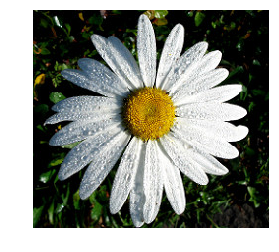

it look like a daisy


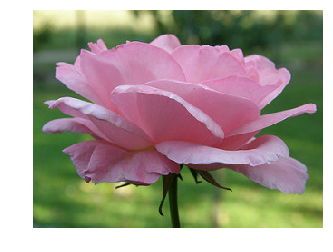

it look like a rose


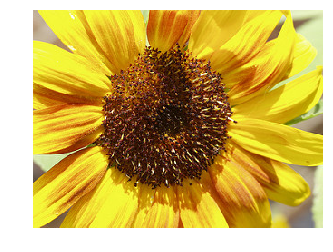

it look like a sunflower


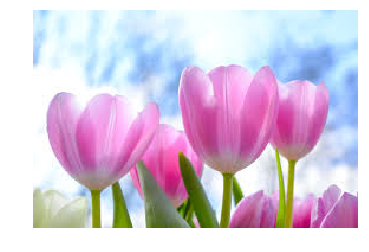

it look like a tulip


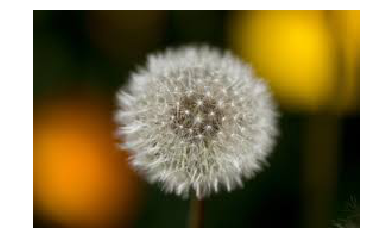

it look like a dandelion


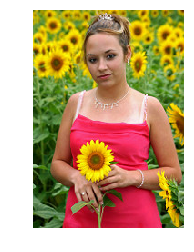

it look like a sunflower


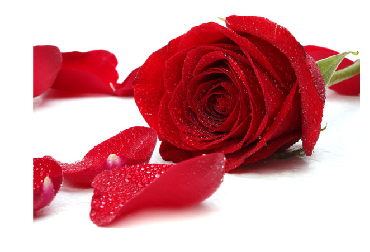

it look like a rose


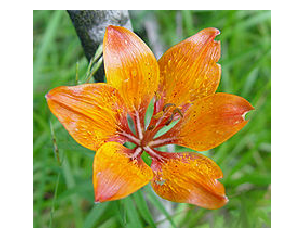

it look like a sunflower


In [40]:
fruit_category_classifier('test_images/1.jpg')
fruit_category_classifier('test_images/2.jpg')
fruit_category_classifier('test_images/3.jpg')
fruit_category_classifier('test_images/4.jpg')
fruit_category_classifier('test_images/5.jpg')
fruit_category_classifier('test_images/6.jpg')
fruit_category_classifier('test_images/7.jpg')
fruit_category_classifier('test_images/8.jpg')